In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import subprocess as sb
import matplotlib.pyplot as plt
from rich import print as rprint

import os
import sys
import cv2

In [2]:
def display_image(image_path, file_name):
    display(Image.open(image_path + file_name))
    age, gender, race, _ = file_name.split('_')
    
    gender_map = {'0': 'Male', '1': 'Female'}
    race_map = {'0': 'White', '1': 'Black', '2': 'Asian', '3': 'Indian'}
    
    rprint(f"AGE : {age} =====&&===== GENDER : {gender_map[str(gender)]} =====&&===== RACE : {race_map[str(race)]}")

## ***Few examples***

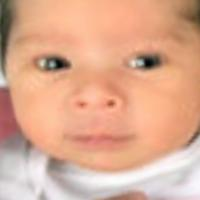

AGE : 1 =====&&===== GENDER : Male =====&&===== RACE : White

In [3]:
image_path = 'sub_dir0/'
file_name = '1_0_0_20161219160713534.jpg.chip.jpg'
display_image(image_path, file_name)

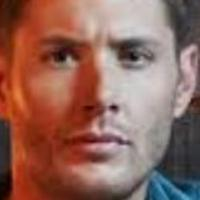

AGE : 28 =====&&===== GENDER : Male =====&&===== RACE : White

In [4]:
image_path = 'sub_dir4/'
file_name = '28_0_0_20170120220122514.jpg.chip.jpg'
display_image(image_path, file_name)

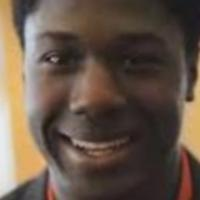

AGE : 28 =====&&===== GENDER : Male =====&&===== RACE : Black

In [5]:
image_path = 'sub_dir4/'
file_name = '28_0_1_20170113173600097.jpg.chip.jpg'
display_image(image_path, file_name)


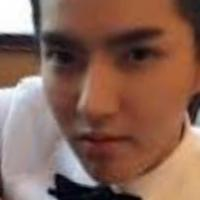

AGE : 28 =====&&===== GENDER : Male =====&&===== RACE : Asian

In [6]:
image_path = 'sub_dir4/'
file_name = '28_0_2_20170116170900610.jpg.chip.jpg'
display_image(image_path, file_name)

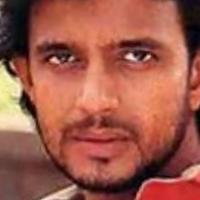

AGE : 28 =====&&===== GENDER : Male =====&&===== RACE : Indian

In [7]:
image_path = 'sub_dir4/'
file_name = '28_0_3_20170117180210549.jpg.chip.jpg'
display_image(image_path, file_name)


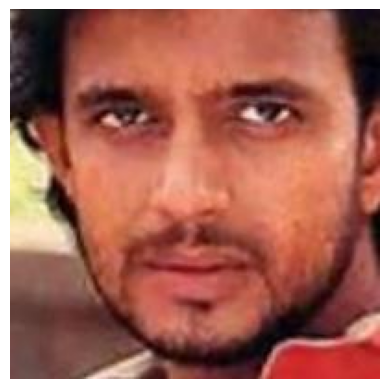

In [8]:
import cv2

# Load the Haar cascade file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
img = cv2.imread(image_path+file_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, minNeighbors=5)

# Draw rectangles
for (x, y, w, h) in faces:
    new_w = int(w * 1.4)
    new_h = int(h * 1.4)

    # Shift top-left corner slightly up and left
    new_x = int(x - (new_w - w) / 2)
    new_y = int(y - (new_h - h) / 2)

    cv2.rectangle(img, (new_x, new_y), (new_x + new_w, new_y + new_h), (255, 0, 0), 2)

    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tqdm import tqdm

# images = []
# ages = []

# for folder in tqdm(['sub_dir0']):  #, 'sub_dir1', 'sub_dir2', 'sub_dir3', 'sub_dir4']):
#     for file in tqdm(os.listdir(folder)):
#         if file.endswith(".jpg"):
#             try:
#                 age = int(file.split("_")[0])  # Extract age from filename
#                 img_path = os.path.join(folder, file)
#                 img = cv2.imread(img_path)
#                 img = cv2.resize(img, (224, 224))  # ResNet input size
#                 images.append(img)
#                 ages.append(age)
#             except:
#                 pass

# images = np.array(images, dtype='float32')
# ages = np.array(ages, dtype='float32')

# # Preprocess for ResNet
# images = tf.keras.applications.resnet50.preprocess_input(images)

# DATA_DIR = ""

def parse_image(filename):
    # Get the last part of the path (basename)
    base = tf.strings.split(filename, os.sep)[-1]

    # Extract age from filename (before first underscore)
    age_str = tf.strings.split(base, "_")[0]
    age = tf.strings.to_number(age_str, out_type=tf.float32)

    # Read and preprocess image
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.resnet50.preprocess_input(img)

    return img, age


import math

# Count total images
total_count = len(list(tf.data.Dataset.list_files("sub_dir*/*.jpg")))

# 80% train, 20% validation
train_size = math.floor(total_count * 0.8)

files = tf.data.Dataset.list_files("sub_dir*/*.jpg", shuffle=True)

train_files = files.take(train_size)
val_files = files.skip(train_size)

train_ds = train_files.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE) \
                      .shuffle(1000) \
                      .batch(32) \
                      .prefetch(tf.data.AUTOTUNE)

val_ds = val_files.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE) \
                  .batch(32) \
                  .prefetch(tf.data.AUTOTUNE)


2025-10-22 11:40:31.760413: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-22 11:40:31.816459: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 11:40:32.089746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-22 11:40:32.089801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-22 11:40:32.090954: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

In [11]:
# Load base ResNet50 without top layer
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
base_model.trainable = True

# Add regression head
# Add deeper head
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

output = tf.keras.layers.Dense(1, activation='relu')(x)  # Age prediction

model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'mse',    #tf.keras.losses.Huber(delta='auto'),
    metrics = ['mae'],
    # jit_compile = True
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    batch_size=32
)

Epoch 1/10
212/593 [=========>....................] - ETA: 30:55 - loss: 915.6839 - mae: 24.5691

KeyboardInterrupt: 

In [13]:
# pred_ages = model.predict(X_test)
# pd.set_option("display.max_rows", None)
DF = pd.DataFrame({
"Actual ages": train_y.reshape(-1,),
"Predicted ages": np.round(pred).reshape(-1,)
})
DF['age_diff'] = DF['Actual ages'] - DF['Predicted ages']
DF.age_diff.plot(kind = 'hist', bins = 50)
plt.show()

NameError: name 'train_y' is not defined

In [37]:
DF[['age_diff']].abs().mean()

age_diff    20.871553
dtype: float32

In [31]:
DF.head(20) #.query("age_diff >= 52")

,Actual ages,Predicted ages,age_diff
0,43.0,5.0,38.0
1,24.0,45.0,-21.0
2,35.0,7.0,28.0
3,37.0,30.0,7.0
4,35.0,2.0,33.0
5,66.0,30.0,36.0
6,32.0,18.0,14.0
7,26.0,23.0,3.0
8,32.0,30.0,2.0
9,1.0,10.0,-9.0


In [17]:
%%time
import tensorflow as tf
import numpy as np

def preprocess_single_image(img_path):
    # Read image from disk
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.resnet50.preprocess_input(img)
    
    # Add batch dimension [1, 224, 224, 3]
    return tf.expand_dims(img, axis=0)

# Path to your new image
img_path = "sub_dir0/"
eval_dict = {'Predicted Age': [], 'Actual Age':[]}
for img in os.listdir(img_path):
    img_tensor = preprocess_single_image(img_path + img)
    predicted_age = model.predict(img_tensor)
    eval_dict['Predicted Age'].append(round(predicted_age[0][0]))
    eval_dict['Actual Age'].append(img.split('_')[1])
    
    print(f"Predicted age: {round(predicted_age[0][0])} years")
    print(f"Actual : {img.split('_')[1]}")

1/1 [==============================] - 0s 97ms/step
Predicted age: 1 years
Actual : 1
1/1 [==============================] - 0s 80ms/step
Predicted age: 1 years
Actual : 1
1/1 [==============================] - 0s 81ms/step
Predicted age: 1 years
Actual : 1
1/1 [==============================] - 0s 81ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 90ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 85ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 83ms/step
Predicted age: 1 years
Actual : 1
1/1 [==============================] - 0s 84ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 86ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 81ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 83ms/step
Predicted age: 0 years
Actual : 0
1/1 [==============================] - 0s 89ms/step
Pr

2025-08-15 23:05:24.895291: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : FAILED_PRECONDITION: sub_dir0/.ipynb_checkpoints; Is a directory


FailedPreconditionError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} sub_dir0/.ipynb_checkpoints; Is a directory [Op:ReadFile]

In [28]:
D = pd.DataFrame(eval_dict)
D['Predicted Age'] = D['Predicted Age'].astype(str)
D['diff'] = D['Predicted Age'] != D['Actual Age']
D.head()

,Predicted Age,Actual Age,diff
0,1,1,False
1,1,1,False
2,1,1,False
3,0,0,False
4,0,0,False


In [29]:
D[D['diff'] == True].shape

(246, 3)

In [30]:
D.shape

(3082, 3)

In [32]:
round(1 - 246/3082, 2)

0.92

In [27]:
D.dtypes

Predicted Age     int64
Actual Age       object
diff               bool
dtype: object

In [26]:
pd.set_option("display.max_rows", None)
D.head(100)

,Predicted Age,Actual Age,diff
0,1,1,True
1,1,1,True
2,1,1,True
3,0,0,True
4,0,0,True
5,0,0,True
6,1,1,True
7,0,0,True
8,0,0,True
9,0,0,True
